## Classification Models

In this lab, we will construct three classification models: Decision Tree Classifier, Rule-Based Classifier, and Naive Bayes Classifier for a same dataset, then compare the metrics.

In [44]:
import pandas as pd
import wittgenstein as lw
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('lab_datasets/trip_dataset.csv').drop(columns=['#No'])
df

,Money,In a Relationship,Weather,Duration,Transportation,Go on Trip
0,High,Yes,Sunny,Long,Easy,Yes
1,High,No,Good,Medium,Easy,Yes
2,Low,Yes,Stormy,Short,Hard,No
3,High,No,Sunny,Long,Easy,Yes
4,High,Yes,Light Rain,Medium,Hard,No
5,High,Yes,Good,Short,Easy,Yes
6,High,Yes,Stormy,Long,Hard,No
7,Low,No,Sunny,Medium,Easy,No


Encoding categorical variables

In [45]:
# Encode categorical variables
encoder = LabelEncoder()
for i in df.columns.tolist():
    df[i] = encoder.fit_transform(df[i])
    
df

,Money,In a Relationship,Weather,Duration,Transportation,Go on Trip
0,0,1,3,0,0,1
1,0,0,0,1,0,1
2,1,1,2,2,1,0
3,0,0,3,0,0,1
4,0,1,1,1,1,0
5,0,1,0,2,0,1
6,0,1,2,0,1,0
7,1,0,3,1,0,0


For lab purposes, we will use the whole dataset since it is small

In [67]:
target = 'Go on Trip'

X = df[df.columns.drop(target)]
y = df[target]

Train with Decision Tree

Accuracy: 1.0


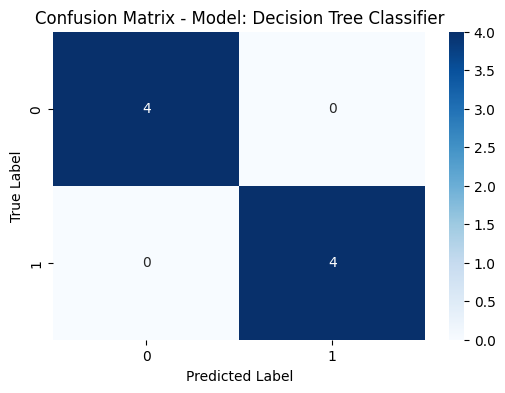

In [68]:
# Train with Decision Tree
model_decisiontree = DecisionTreeClassifier(random_state=42)
model_decisiontree.fit(X, y)

y_pred = model_decisiontree.predict(X)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

unique_labels = np.unique(y).tolist()
# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Model: Decision Tree Classifier")
plt.show()

Accuracy: 0.875


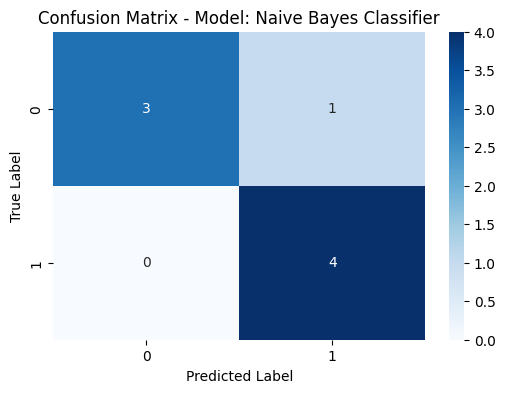

In [70]:
# Train with Naive Bayes
model_naivebayes = CategoricalNB(alpha=1)
model_naivebayes.fit(X, y)

y_pred = model_naivebayes.predict(X)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

unique_labels = np.unique(y).tolist()
# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Model: Naive Bayes Classifier")
plt.show()

Accuracy: 0.625


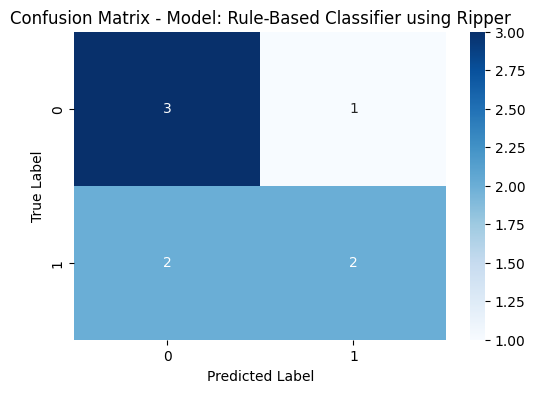

In [73]:
# Train with Ripper
model_ripper = lw.RIPPER(random_state=42)
model_ripper.fit(X, y)

y_pred = model_ripper.predict(X)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

unique_labels = np.unique(y).tolist()
# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Model: Rule-Based Classifier using Ripper")
plt.show()